In [22]:
import pybaseball as pyb
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime

### Exploring `statcast`: pitch-level statcast data (i.e data recorded for every pitch)

In [25]:
from pybaseball import statcast
df = statcast(start_dt="2019-06-24", end_dt="2019-06-25")
print(df.shape)

This is a large query, it may take a moment to complete


  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\82103\OneDrive\Desktop\moneyball-pipeline\venv\Lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|█████     | 1/2 [00:00<00:00,  1.42it/s]c:\Users\82103\OneDrive\Desktop\moneyball-pipeline\venv\Lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

(6439, 118)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6439 entries, 2924 to 2086
Columns: 118 entries, pitch_type to intercept_ball_minus_batter_pos_y_inches
dtypes: Float64(34), Int64(67), datetime64[ns](1), object(16)
memory usage: 6.5+ MB


- Null value profile by columns

In [32]:
profile = (pd.DataFrame({
              'nulls'     : df.isna().sum(),      
              'null_frac' : df.isna().mean(),    
              'dtype'     : df.dtypes,            
              'n_unique'  : df.nunique(dropna=True) 
          })
          .sort_values('null_frac', ascending=False))

profile.head(25)


,nulls,null_frac,dtype,n_unique
break_angle_deprecated,6439,1.000000,Int64,0
break_length_deprecated,6439,1.000000,Int64,0
spin_dir,6439,1.000000,Int64,0
spin_rate_deprecated,6439,1.000000,Int64,0
umpire,6439,1.000000,Int64,0
sv_id,6439,1.000000,Int64,0
tfs_deprecated,6439,1.000000,Int64,0
tfs_zulu_deprecated,6439,1.000000,Int64,0
attack_angle,6439,1.000000,Int64,0
arm_angle,6439,1.000000,Int64,0


- Null value profile by rows

<Axes: >

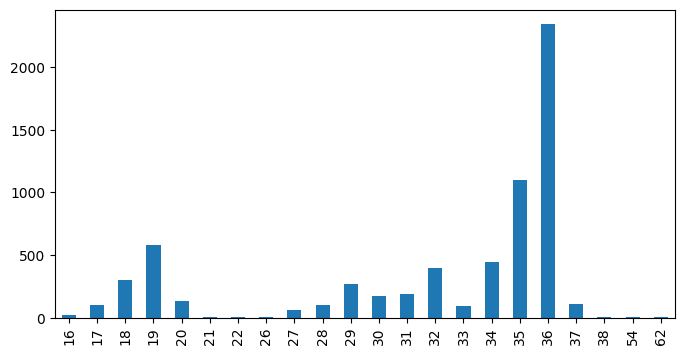

In [33]:
row_nulls = df.isna().sum(axis=1)   # how many NA’s in *each* row
row_nulls.value_counts().sort_index().plot.bar(figsize=(8,4))

### Exploring `batting_stats`

In [34]:
from pybaseball import batting_stats

batting_2023 = batting_stats(2023)
print(batting_2023.shape)
print(list(batting_2023.columns))

(134, 320)
['IDfg', 'Season', 'Name', 'Team', 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG', 'GB', 'FB', 'LD', 'IFFB', 'Pitches', 'Balls', 'Strikes', 'IFH', 'BU', 'BUH', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'BUH%', 'wOBA', 'wRAA', 'wRC', 'Bat', 'Fld', 'Rep', 'Pos', 'RAR', 'WAR', 'Dol', 'Spd', 'wRC+', 'WPA', '-WPA', '+WPA', 'RE24', 'REW', 'pLI', 'phLI', 'PH', 'WPA/LI', 'Clutch', 'FB% (Pitch)', 'FBv', 'SL%', 'SLv', 'CT%', 'CTv', 'CB%', 'CBv', 'CH%', 'CHv', 'SF%', 'SFv', 'KN%', 'KNv', 'XX%', 'PO%', 'wFB', 'wSL', 'wCT', 'wCB', 'wCH', 'wSF', 'wKN', 'wFB/C', 'wSL/C', 'wCT/C', 'wCB/C', 'wCH/C', 'wSF/C', 'wKN/C', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'BsR', 'FA% (sc)', 'FT% (sc)', 'FC% (sc)', 'FS% (sc)', 'FO% (sc)', 'SI% (sc)', 'SL% (sc)', 'CU% (sc)', 'KC% (sc)', 'EP% (s

In [35]:
batting_2023.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
1,18401,2023,Ronald Acuna Jr.,ATL,25,159,643,735,217,137,...,121.2,310,0.552,562,0.137,0.214,0.357,0.660,0.460,8.5
5,5361,2023,Freddie Freeman,LAD,33,161,637,730,211,121,...,110.6,218,0.418,521,0.114,0.208,0.320,0.562,0.406,7.8
3,13611,2023,Mookie Betts,LAD,30,152,584,693,179,99,...,110.1,232,0.481,482,0.205,0.262,0.294,0.563,0.407,8.1
0,19755,2023,Shohei Ohtani,LAA,28,135,497,599,151,73,...,118.6,193,0.533,362,0.125,0.264,0.295,0.637,0.427,6.7
4,14344,2023,Matt Olson,ATL,29,162,608,720,172,88,...,118.6,245,0.551,445,0.130,0.249,0.264,0.558,0.392,6.8


### Exploring `pitching_stats`

In [37]:
from pybaseball import pitching_stats
pitching_2023 = pitching_stats(2023)
print(pitching_2023.shape)
print(list(pitching_2023.columns))

(44, 393)
['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH', 'BU', 'BUH', 'K/9', 'BB/9', 'K/BB', 'H/9', 'HR/9', 'AVG', 'WHIP', 'BABIP', 'LOB%', 'FIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'BUH%', 'Starting', 'Start-IP', 'Relieving', 'Relief-IP', 'RAR', 'Dollars', 'tERA', 'xFIP', 'WPA', '-WPA', '+WPA', 'RE24', 'REW', 'pLI', 'inLI', 'gmLI', 'exLI', 'Pulls', 'WPA/LI', 'Clutch', 'FB% 2', 'FBv', 'SL%', 'SLv', 'CT%', 'CTv', 'CB%', 'CBv', 'CH%', 'CHv', 'SF%', 'SFv', 'KN%', 'KNv', 'XX%', 'PO%', 'wFB', 'wSL', 'wCT', 'wCB', 'wCH', 'wSF', 'wKN', 'wFB/C', 'wSL/C', 'wCT/C', 'wCB/C', 'wCH/C', 'wSF/C', 'wKN/C', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'HLD', 'SD', 'MD', 'ERA-', 'FIP-', 'xFIP-', 'K%', 'BB%', 'SIERA', 'RS/9', 'E-

In [38]:
pitching_2023.head()

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
19,10310,2023,Zack Wheeler,PHI,33,13,6,5.9,3.61,32,...,106.0,NaN,NaN,NaN,117,106,122,NaN,NaN,NaN
26,27498,2023,Spencer Strider,ATL,24,20,5,5.4,3.86,32,...,NaN,NaN,NaN,NaN,117,100,114,NaN,NaN,NaN
2,12768,2023,Sonny Gray,MIN,33,8,8,5.4,2.79,32,...,104.0,NaN,NaN,NaN,99,98,101,NaN,NaN,NaN
1,13125,2023,Gerrit Cole,NYY,32,15,4,5.3,2.63,33,...,104.0,NaN,NaN,NaN,107,106,112,NaN,NaN,NaN
6,14107,2023,Kevin Gausman,TOR,32,12,9,5.3,3.16,31,...,NaN,104.0,104.0,111.0,100,104,106,NaN,NaN,NaN


### Saving 2023 data for testing/exploration

In [40]:
batting_2023.to_csv('data/raw/batting_2023.csv', index=False)
pitching_2023.to_csv('data/raw/pitching_2023.csv', index=False)